In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
 
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5681, done.
remote: Counting objects: 100% (1047/1047), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 5681 (delta 567), reused 971 (delta 495), pack-reused 4634
Receiving objects: 100% (5681/5681), 8.34 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (3572/3572), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help

__LECTURE-3 DEMOS__

Q: What is the language? A: it is {0101} {0,1}*

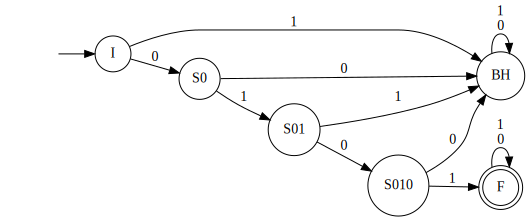

In [9]:
Begin0101 = md2mc('''
DFA 
 
 I: 0 -> S0
 I: 1 -> BH !! Can't progress

 S0 : 1 -> S01 !! 
 S0 : 0 -> BH

 S01 : 0 -> S010
 S01 : 1 -> BH

 S010 : 1 -> F 
 S010 : 0 -> BH

 F  : 0|1 -> F

 BH : 0|1 -> BH

''')

dotObj_dfa_w_bh(Begin0101, FuseEdges=True)

In [10]:
Begin0101

{'Q': {'BH', 'F', 'I', 'S0', 'S01', 'S010'},
 'Sigma': {'0', '1'},
 'Delta': {('I', '0'): 'S0',
  ('I', '1'): 'BH',
  ('S0', '1'): 'S01',
  ('S0', '0'): 'BH',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'BH',
  ('S010', '1'): 'F',
  ('S010', '0'): 'BH',
  ('F', '0'): 'F',
  ('F', '1'): 'F',
  ('BH', '0'): 'BH',
  ('BH', '1'): 'BH'},
 'q0': 'I',
 'F': {'F'}}

In [ ]:
dotObj_dfa_w_bh(Begin0101, FuseEdges=True)

In [11]:
step_dfa(Begin0101, 'I', '1')

'BH'

In [12]:
run_dfa(Begin0101, '010101')

'F'

In [14]:
accepts_dfa(Begin0101, '00101')

False

 
 Testing the DFA systematically.

 __Systematic testing of any program consists of exhausting a space of small inputs first. Then you can test for some longer-length strings at random. Below, this opportunity is offered for you to practice!__

In [19]:
# Test the Even010 machine : The length of 2048 seems necessary to get far into the accepted list of strings

from jove.LangDef import *
TestStrings = [nthnumeric(i, ['0','1']) for i in range(150)]

# Now, generate a printout of all accepted strings

[ (s, "Rejected") for s in TestStrings  if not(accepts_dfa(Begin0101, s))]



[('', 'Rejected'),
 ('0', 'Rejected'),
 ('1', 'Rejected'),
 ('00', 'Rejected'),
 ('01', 'Rejected'),
 ('10', 'Rejected'),
 ('11', 'Rejected'),
 ('000', 'Rejected'),
 ('001', 'Rejected'),
 ('010', 'Rejected'),
 ('011', 'Rejected'),
 ('100', 'Rejected'),
 ('101', 'Rejected'),
 ('110', 'Rejected'),
 ('111', 'Rejected'),
 ('0000', 'Rejected'),
 ('0001', 'Rejected'),
 ('0010', 'Rejected'),
 ('0011', 'Rejected'),
 ('0100', 'Rejected'),
 ('0110', 'Rejected'),
 ('0111', 'Rejected'),
 ('1000', 'Rejected'),
 ('1001', 'Rejected'),
 ('1010', 'Rejected'),
 ('1011', 'Rejected'),
 ('1100', 'Rejected'),
 ('1101', 'Rejected'),
 ('1110', 'Rejected'),
 ('1111', 'Rejected'),
 ('00000', 'Rejected'),
 ('00001', 'Rejected'),
 ('00010', 'Rejected'),
 ('00011', 'Rejected'),
 ('00100', 'Rejected'),
 ('00101', 'Rejected'),
 ('00110', 'Rejected'),
 ('00111', 'Rejected'),
 ('01000', 'Rejected'),
 ('01001', 'Rejected'),
 ('01100', 'Rejected'),
 ('01101', 'Rejected'),
 ('01110', 'Rejected'),
 ('01111', 'Rejected'),


 

Animation
 

In [21]:
from jove.AnimateDFA import *
#-- if you want: help(AnimateDFA)

AnimateDFA(Begin0101, FuseEdges=True)
#-- without the line below, you won't see the play buttons!!
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

__EXTREME DFA__

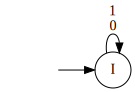

In [22]:
# Zero Language DFA over {0,1} -- { }
ZeroL_dfa = md2mc('''
DFA 
 
 I : 0|1 -> I
''')
dotObj_dfa_w_bh(ZeroL_dfa, FuseEdges=True )


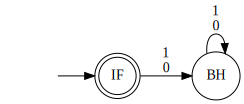

In [25]:
# Unit Language DFA over {0,1}  -- {''}
UnitL_dfa = md2mc('''
DFA 

IF : 0|1 -> BH
BH : 0|1 -> BH

 
''')
dotObj_dfa_w_bh(UnitL_dfa, FuseEdges=True )

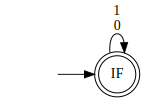

In [26]:
# Universal Language DFA over {0,1} i.e. Sigma*
Universal_lang_dfa = md2mc('''
DFA 
 
 IF : 0|1 -> IF
''')
dotObj_dfa_w_bh(Universal_lang_dfa, FuseEdges=True )

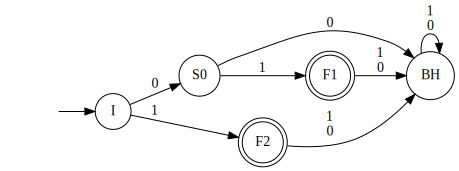

In [33]:
# A finite_language DFA over {0,1} i.e. {'', '01', '1'} # Try {'01', '1'} later
A_fin_lang_dfa = md2mc('''
DFA 
 
 I  : 0 -> S0
 S0 : 1 -> F1
 I  : 1 -> F2

''')
Totalized = totalize_dfa(A_fin_lang_dfa)

dotObj_dfa_w_bh(Totalized, FuseEdges=True )

In [30]:
A_fin_lang_dfa

{'Q': {'F1', 'F2', 'IF', 'S0'},
 'Sigma': {'0', '1'},
 'Delta': {('IF', '0'): 'S0', ('S0', '1'): 'F1', ('IF', '1'): 'F2'},
 'q0': 'IF',
 'F': {'F1', 'F2', 'IF'}}


Definition of End0101

What is the language?

Then after that, try Contains 0101

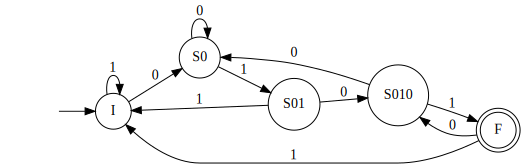

In [36]:
End0101 =  md2mc('''
DFA

!! Again, follow the commenting plans and write the "DFA code" in neat bunches

I : 0 -> S0
I : 1 -> I

S0 : 0 -> S0
S0 : 1 -> S01

S01 : 0 -> S010
S01 : 1 -> I

S010 : 0 -> S0
S010 : 1 -> F

F : 0 -> S010
F : 1 -> I



''')

dotObj_dfa_w_bh(End0101, FuseEdges=True)

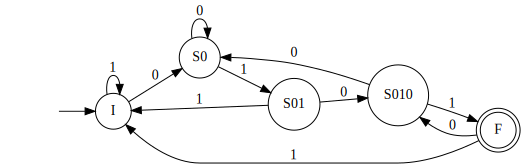

In [39]:
# Let's see the "End0101" machine
dotObj_dfa(End0101, FuseEdges=True)


Computing the intersection with Begin010

In [44]:
Begin_and_end_0101 = intersect_dfa(Begin0101,End0101)
# dotObj_dfa()


In [48]:
len(Begin_and_end_0101["Q"])

14

In [50]:
min_BE_0101 = min_dfa(Begin_and_end_0101)
len(min_BE_0101["Q"])


10

In [47]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



Now, obtain the intersection of Even010 (the DFA obtained in Question 2) and Ends010 using the function *intersect_dfa*. Obtain a description of this algorithm first.

Then try DFA minimization!

# END